In [1]:
# !pip install autobnn
import pandas as pd
import jax
import jax.numpy as jnp

import numpy as np
import matplotlib.pyplot as plt

from autobnn import estimators
from autobnn import operators
from autobnn import kernels
from autobnn import likelihoods
from autobnn import training_util

seed = jax.random.PRNGKey(0)

In [2]:
df = pd.read_csv(r'data\binance\2021.1.1_2024.3.26\bitcoin_15m_2021.1.1_2024.3.26.csv')

In [3]:
last_1000_close = np.array(df['close'])[-1000:].astype(np.float32)
num_forecast_steps = 4 # Forecast 4 last close prices
last_1000_close_training_data = last_1000_close[:-num_forecast_steps]

close_index = np.arange(len(last_1000_close))

Text(0, 0.5, 'Price(USD)')

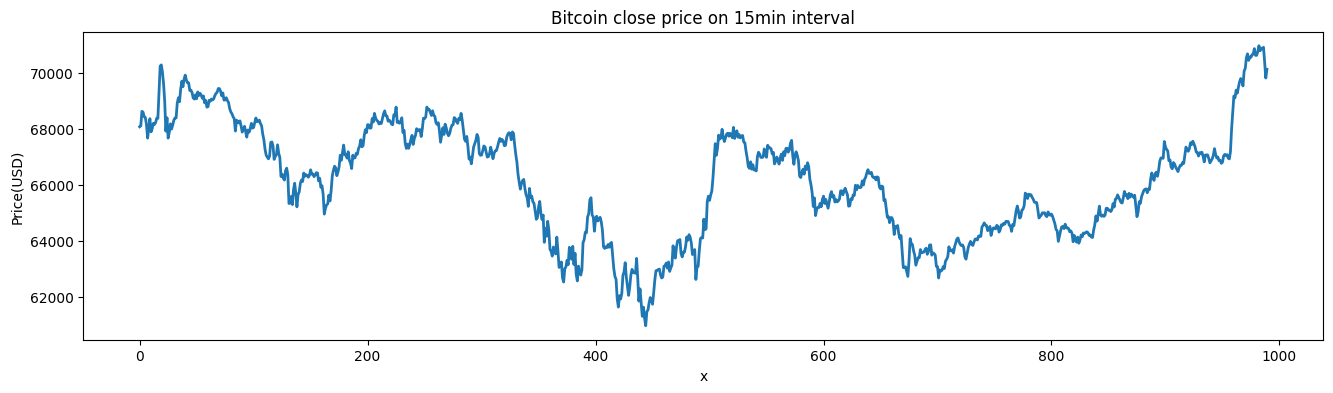

In [14]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(close_index[:-num_forecast_steps], last_1000_close_training_data, lw=2)
plt.title("Bitcoin close price on 15min interval")
plt.xlabel("x")
plt.ylabel("Price(USD)")

In [4]:
x_test = np.arange(len(last_1000_close), dtype=np.float32)
y_test = last_1000_close
x_train = x_test[:-num_forecast_steps]
y_train = last_1000_close_training_data

x_scale = x_train.max()
x_train = x_train / x_scale
x_test = x_test / x_scale

one_hour = jnp.array(4. / x_scale, dtype=jnp.float32) #15min interval data

In [7]:
# %%time
fit_seed, pred_seed, seed = jax.random.split(seed, 3)

est = estimators.AutoBnnMapEstimator(
    'sum_of_products',
    likelihood_model='normal_likelihood_logistic_noise',
    seed=jax.random.PRNGKey(0),
    periods=(one_hour,),
    num_particles=32,
)

est = est.fit(x_train[..., None], y_train[..., None])

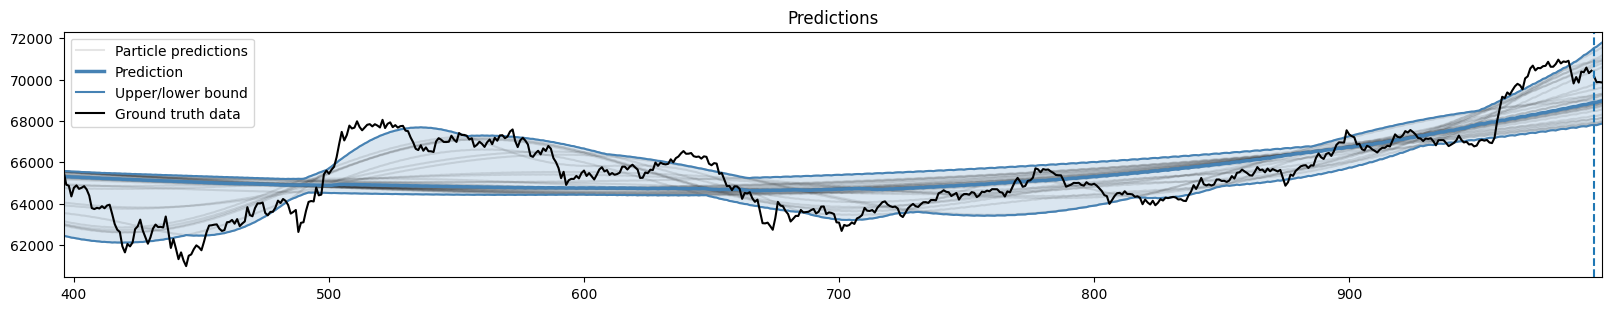

In [35]:
preds = est.predict(x_test[..., None])
lo, mid, p90, hi = est.predict_quantiles(x_test[..., None], q=[2.5, 50., 90., 97.5])


In [1]:
hi

NameError: name 'hi' is not defined